**Name:** Luan Minh Tran

**NetID:** lmt185

**RUID:** 197002611

In [ ]:
import numpy as np
import cv2
import glob
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving board2.jpg to board2.jpg
User uploaded file "board2.jpg" with length 126992 bytes


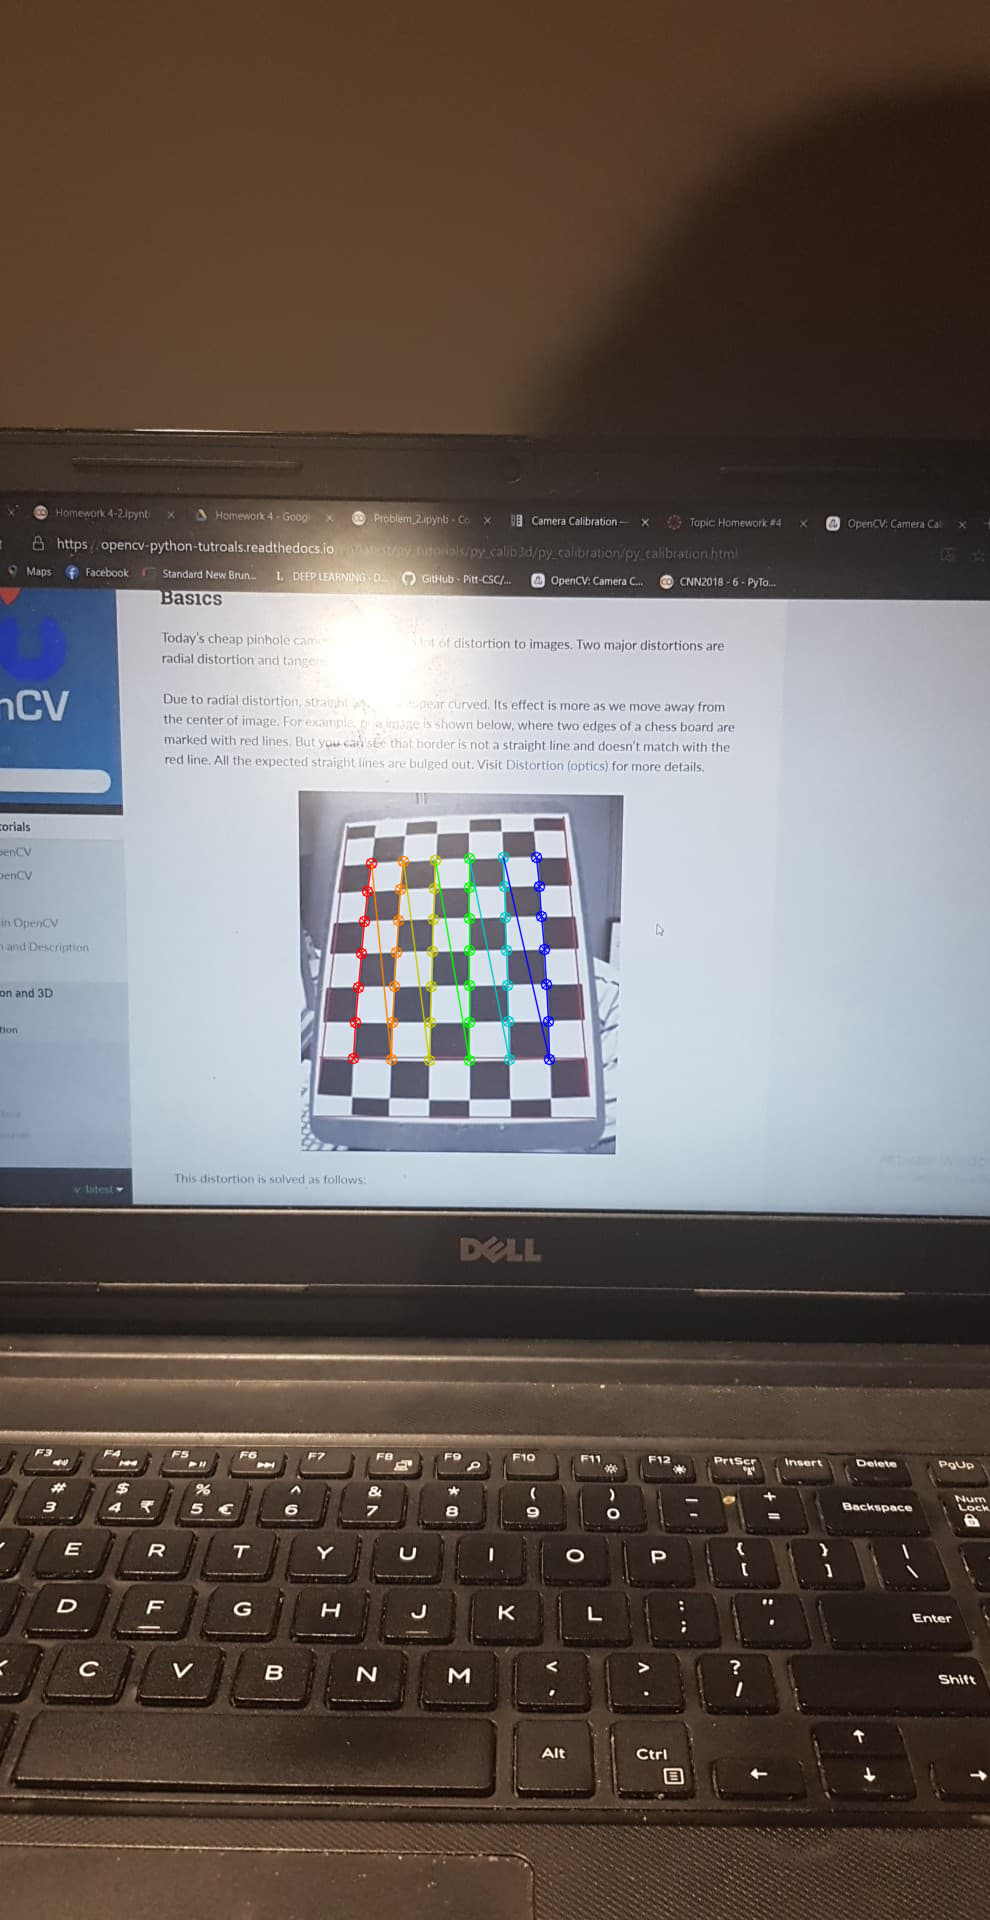

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.



for fn in uploaded.keys():
    img = cv2.imread(fn)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,6), corners2,ret)
        cv2_imshow(img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

In [ ]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
print('Instrisic matrix')
print(mtx)
print('Extrisic matrix')
rmat,_ = cv2.Rodrigues(rvecs[0])
R = np.asarray(rmat)
t = np.asarray(tvecs).reshape(3,1)
T = np.concatenate((R,t), axis = 1)
print(T)

Instrisic matrix
[[ 22.31739019   0.         495.00052409]
 [  0.          20.46158369 959.99898822]
 [  0.           0.           1.        ]]
Extrisic matrix
[[-2.05511622e-02  9.99783294e-01  3.31873710e-03 -3.63488567e+00]
 [-9.99643175e-01 -2.06047096e-02  1.69990546e-02  2.78167135e+00]
 [ 1.70637525e-02 -2.96820257e-03  9.99849998e-01  5.56632077e-01]]


### **Problem 3**

In [ ]:
I = np.eye(3)
It = np.concatenate((I, t), axis = 1)
M = np.matmul(np.matmul(mtx, R), It)
print(M)
print(M.shape)

[[ 7.98791811e+00  2.08432921e+01  4.95000338e+02  3.04477086e+02]
 [-4.07309740e+00 -3.27107645e+00  9.60202814e+02  5.40185870e+02]
 [ 1.70637525e-02 -2.96820257e-03  9.99849998e-01  4.86267227e-01]]
(3, 4)


In [ ]:
KR = np.matmul(mtx, R)
KR_inv = np.linalg.inv(KR)
q, r = np.linalg.qr(KR_inv)
print(q)
print(r)

[[-0.02055116 -0.99964318  0.01706375]
 [ 0.99978329 -0.02060471 -0.0029682 ]
 [ 0.00331874  0.01699905  0.99985   ]]
[[ 4.48081067e-02  0.00000000e+00 -2.21800363e+01]
 [ 0.00000000e+00  4.88720724e-02 -4.69171401e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [ ]:
T_test = np.concatenate((np.linalg.inv(q), t), axis = 1)
print("T after QR decomposition is: \n",T_test)
print("K after QR decomposition is: \n", np.linalg.inv(r))

T after QR decomposition is: 
 [[-2.05511622e-02  9.99783294e-01  3.31873710e-03 -3.63488567e+00]
 [-9.99643175e-01 -2.06047096e-02  1.69990546e-02  2.78167135e+00]
 [ 1.70637525e-02 -2.96820257e-03  9.99849998e-01  5.56632077e-01]]
K after QR decomposition is: 
 [[ 22.31739019   0.         495.00052409]
 [  0.          20.46158369 959.99898822]
 [  0.           0.           1.        ]]


### **Problem 4**

T makes sense because after QR Decomposition to get rotation matrix and combine with translation vector, I get exactly the same T when I used to find M